In [3]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# We need to import key libraries that we're going to use.  
# For now this is just numpy, which is our linear algebra library
import numpy as np

np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline 
# This command figures show up in the notebook.  It's a "magic" command...
# Typically, this now happens by default so it is often an unnecessary command, but is good for standardization.
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


from sklearn import datasets, linear_model, model_selection, neighbors, feature_selection
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

#dataset of cancer from sklearn
x_train,x_valid,y_train,y_valid=\
    model_selection.train_test_split(cancer['data'],cancer['target'],random_state=42)

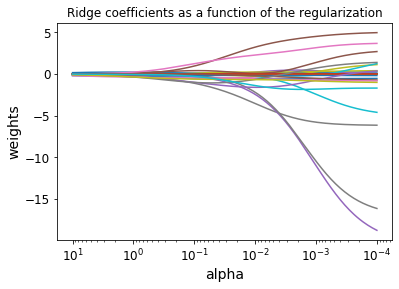

Best alpha is 0.02736439997074672 when min mse_valid is 0.05551530769226177 for ridge regression


In [8]:
n_alphas = 200
alphas = np.logspace(-4, 1, n_alphas)
min_mse_valid = 0
best_alpha = 0

coefs = []
mse_valid=[]
for a in alphas:
    ridge=linear_model.Ridge(alpha=a)
    ridge.fit(x_train, y_train)
    coefs.append(ridge.coef_)
    cur_mse = mean_squared_error(y_true=y_valid,y_pred=ridge.predict(x_valid))
    mse_valid.append(cur_mse)
    if min_mse_valid==0 or min_mse_valid > cur_mse:
        min_mse_valid = cur_mse
        best_alpha = a
        

fig=plt.figure(figsize=[6,4])
ax = plt.gca()
plt.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

print("Best alpha is "+str(best_alpha)+" when min mse_valid is "+str(min_mse_valid)+" for ridge regression")

/Users/ruiyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.23220935444648, tolerance: 0.009939906103286385
  positive)
/Users/ruiyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.261027649555094, tolerance: 0.009939906103286385
  positive)
/Users/ruiyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.288729449031392, tolerance: 0.009939906103286385
  positive)
/Users/ruiyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge.

/Users/ruiyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.906194242237705, tolerance: 0.009939906103286385
  positive)
/Users/ruiyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.87857653725303, tolerance: 0.009939906103286385
  positive)
/Users/ruiyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.843270800230158, tolerance: 0.009939906103286385
  positive)
/Users/ruiyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge.

/Users/ruiyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.025686526320683356, tolerance: 0.009939906103286385
  positive)
/Users/ruiyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03136136914516641, tolerance: 0.009939906103286385
  positive)
/Users/ruiyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.036253809070437626, tolerance: 0.009939906103286385
  positive)
/Users/ruiyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not con

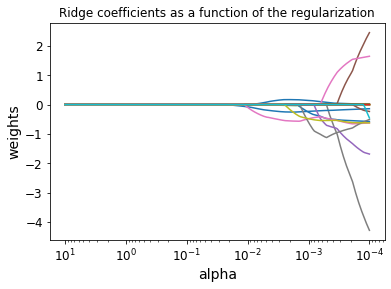

Best alpha is 0.00020022003718155845 when min mse_valid is 0.05677335049010067 for lasso regression


In [10]:
n_alphas = 200
alphas = np.logspace(-4, 1, n_alphas)
min_mse_valid = 0
best_alpha = 0
coefs = []
mse_valid=[]

for a in alphas:
    ridge=linear_model.Lasso(alpha=a)
    ridge.fit(x_train, y_train)
    coefs.append(ridge.coef_)
    cur_mse = mean_squared_error(y_true=y_valid,y_pred=ridge.predict(x_valid))
    mse_valid.append(cur_mse)
    if min_mse_valid==0 or min_mse_valid > cur_mse:
        min_mse_valid = cur_mse
        best_alpha = a
        

fig=plt.figure(figsize=[6,4])
ax = plt.gca()
plt.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

print("Best alpha is "+str(best_alpha)+" when min mse_valid is "+str(min_mse_valid)+" for lasso regression")

In this case I would prefer Ridge regression. These two regression does not have huge difference in MSE, which is the metric we are using to judge regression performance. But Lasso regression does ont converge in our testing range. So I prefer Ridge regression in this case.